In [27]:
#Project Title: Investigating the fandango movie rating data 
#In this project, I will check if any discrepancy exists
#in the fandango movie ratings after Hickey's claim and analysis


In [28]:
%matplotlib inline
import pandas as pd
data_before_HA = pd.read_csv("fandango_score_comparison.csv") 
data_after_HA = pd.read_csv("movie_ratings_16_17.csv")
before_POI_data = data_before_HA[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
after_POI_data = data_after_HA[['movie', 'year', 'fandango']].copy()

In [29]:
print(before_POI_data)


                                               FILM  Fandango_Stars  \
0                    Avengers: Age of Ultron (2015)             5.0   
1                                 Cinderella (2015)             5.0   
2                                    Ant-Man (2015)             5.0   
3                            Do You Believe? (2015)             5.0   
4                     Hot Tub Time Machine 2 (2015)             3.5   
5                          The Water Diviner (2015)             4.5   
6                             Irrational Man (2015)             4.0   
7                                   Top Five (2014)             4.0   
8                      Shaun the Sheep Movie (2015)             4.5   
9                               Love & Mercy (2015)             4.5   
10                Far From The Madding Crowd (2015)             4.5   
11                                 Black Sea (2015)             4.0   
12                                 Leviathan (2014)             4.0   
13    

In [30]:
print(after_POI_data)

                                  movie  year  fandango
0                   10 Cloverfield Lane  2016       3.5
1                              13 Hours  2016       4.5
2                   A Cure for Wellness  2016       3.0
3                       A Dog's Purpose  2017       4.5
4               A Hologram for the King  2016       3.0
5                       A Monster Calls  2016       4.0
6                A Street Cat Named Bob  2016       4.5
7       Alice Through the Looking Glass  2016       4.0
8                                Allied  2016       4.0
9                         Amateur Night  2016       3.5
10                           Anthropoid  2016       4.0
11              Approaching the Unknown  2016       3.5
12                              Arrival  2016       4.0
13                              Arsenal  2017       3.5
14                     Assassin's Creed  2016       4.0
15                             Bad Moms  2016       4.5
16                          Bad Santa 2  2016   

In [31]:
#Both the samples are not representative as all 
#the movies didn't have an equal chance to be included in the sample

In [32]:
#Modified Goal: change in the ratings of popular movies
#(we keep 30 reviews as threshold for popular movies) 
#movies in 2015 and 2016

In [33]:
#sample data after hickey analysis does not include no of reviews, therefore
#we print a sample of 10 data points and check the corresponding ratings
sample_after = after_POI_data.sample(10, random_state = 1)
print(sample_after)

                                       movie  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5


In [34]:
#to check whether the data before hickey analysis 
#contains movies with less than 30 fan reviews
print(before_POI_data[before_POI_data['Fandango_votes']<30]) 

Empty DataFrame
Columns: [FILM, Fandango_Stars, Fandango_Ratingvalue, Fandango_votes, Fandango_Difference]
Index: []


In [35]:
#separate year and store in a separate column
before_POI_data['Year'] = before_POI_data['FILM'].str[-5:-1]
before_POI_data['Year'].value_counts()
#print(before_POI_data.head(4))




2015    129
2014     17
Name: Year, dtype: int64

In [36]:
# movies released in 2015 and 2016 separated into different datasets
before_data_2015 = before_POI_data[before_POI_data['Year'] == '2015'].copy()
before_data_2015['Year'].value_counts()
after_data_2016 = after_POI_data[after_POI_data['year'] == 2016].copy()
after_data_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

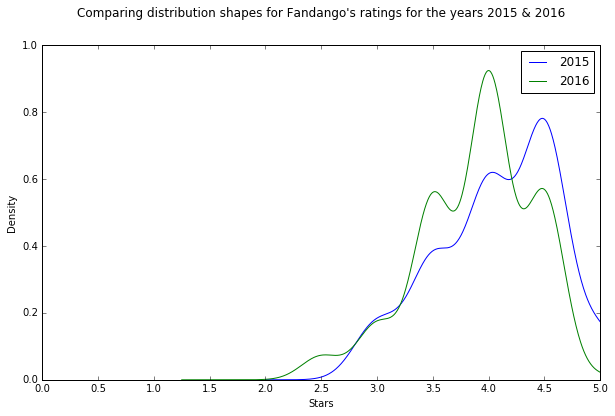

In [37]:
import matplotlib.pyplot as plt
from numpy import arange
before_data_2015['Fandango_Stars'].plot.kde(label ='2015' , legend = True , figsize = (10,6))
after_data_2016['fandango'].plot.kde(label ='2016' , legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings for the years 2015 & 2016", y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

In [38]:
print("Frequency Distribution of Ratings(2015)")
before_data_2015["Fandango_Stars"].value_counts(normalize = True).sort_index() * 100 

Frequency Distribution of Ratings(2015)


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [39]:
print("Frequency Distribution of Ratings(2016)")
after_data_2016["fandango"].value_counts(normalize = True).sort_index() * 100

Frequency Distribution of Ratings(2016)


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [40]:
#comparing movie rating freq distribution for 2015 and 2016 
# 5 Star rating(2016): under 1% (LOWER)
# 5 Star rating(2015): under ~7%

# 4.5 Star rating(2016): under 24% (LOWER)
# 4.5 Star rating(2015): under 37%

# Minimum rating of movies released in 2016 is 2.5 stars
# Minimum rating of movies released in 2015 is 3.0 stars

# High no. of movies received 3.5 and 4.0 stars in 2016 as compared to 2015.

# These are the evident differences between the two
# frequency distributions.


In [44]:
movies_mean_2015 = before_data_2015['Fandango_Stars'].mean()
movies_mean_2016 = after_data_2016['fandango'].mean()

movies_median_2015 = before_data_2015['Fandango_Stars'].median()
movies_median_2016 = after_data_2016['fandango'].median()

movies_mode_2015 = before_data_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
movies_mode_2016 = after_data_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [movies_mean_2015, movies_median_2015, movies_mode_2015]
summary['2016'] = [movies_mean_2016, movies_median_2016, movies_mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


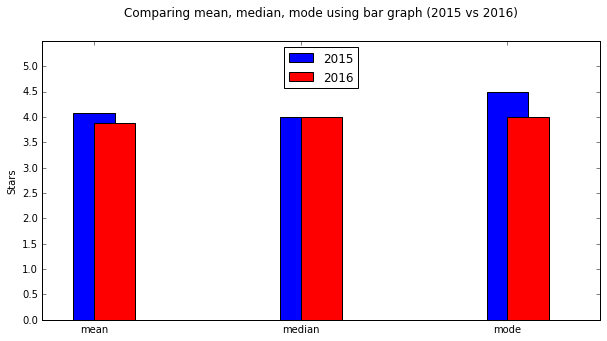

In [53]:
summary['2015'].plot.bar(width = 0.2, color = 'blue', align = 'center', label = '2015')
summary['2016'].plot.bar(width = 0.2, color = 'red', align = 'edge', label = '2016',
                          figsize = (10,5))

plt.title('Comparing mean, median, mode using bar graph (2015 vs 2016)', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.xticks(rotation = 0)
plt.show()